In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')
plt.rc("font", family="Malgun Gothic")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623           목         17           1   
1        TRAIN_0000001   20220728           목         21           2   
2        TRAIN_0000002   20211010           일          7           2   
3        TRAIN_0000003   20220311           금         13           2   
4        TRAIN_0000004   20211005           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212   20211104           목         16           1   
4701213  TRAIN_4701213   20220331           목          2           2   
4701214  TRAIN_4701214   20220613           월         22           2   
4701215  TRAIN_4701215   20211020           수          2           2   
4701216  TRAIN_4701216   20211019           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107          -             0             0   
4701213          107          -             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  ...  road_type  start_node_name  start_latitude  \
0                       60.0  ...          3            제3교래교       33.427747   
1                       60.0  ...          0            광양사거리       33.500730   
2                       80.0  ...          0             창고천교       33.279145   
3                       50.0  ...          0            남양리조트       33.246081   
4                       80.0  ...          0             애월샷시       33.462214   
...                      ...  ...        ...              ...             ...   
4701212                 50.0  ...          0            대림사거리       33.422145   
4701213                 80.0  ...          3              광삼교       33.472505   
4701214                 60.0  ...          0            고성교차로       33.447183   
4701215                 80.0  ...          0            제6광령교       33.443596   
4701216                 60.0  ...          0           서귀포경찰서       33.256785   

         start_longitude start_turn_restricted  end_node_name  end_latitude  \
0             126.662612                    없음          제3교래교     33.427749   
1             126.529107                    있음         KAL사거리     33.504811   
2             126.368598                    없음           상창육교     33.280072   
3             126.567204                    없음           서현주택     33.245565   
4             126.326551                    없음           애월입구     33.462677   
...                  ...                   ...            ...           ...   
4701212       126.278125                    없음           금덕해운     33.420955   
4701213       126.424368                    없음            광삼교     33.472525   
4701214       126.912579                    없음          성산교차로     33.444121   
4701215       126.431817                    없음         관광대학입구     33.444996   
4701216       126.508940                    없음           시민공원     33.257130   

        end_longitude end_turn_restricted  target  
0          126.662335                  없음    52.0  
1          126.526240                  없음    30.0  
2          126.362147                  없음    61.0  
3          126.566228                  없음    20.0  
4          126.330152                  없음    38.0  
...               ...                 ...     ...  
4701212    126.273750                  없음    20.0  
4701213    126.424890                  없음    65.0  
4701214 

In [4]:
train.isnull().sum()   #no null value

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [5]:
column_names = train.columns.values.tolist()

for i in column_names:
    print(f"{i} = {train[i].nunique()}")
# 61 roads, 586 start/end latitude/longitude, and 487 start/end nodes

id = 4701217
base_date = 281
day_of_week = 7
base_hour = 24
lane_count = 3
road_rating = 3
road_name = 61
multi_linked = 2
connect_code = 2
maximum_speed_limit = 6
vehicle_restricted = 1
weight_restricted = 4
height_restricted = 1
road_type = 2
start_node_name = 487
start_latitude = 586
start_longitude = 586
start_turn_restricted = 2
end_node_name = 487
end_latitude = 586
end_longitude = 586
end_turn_restricted = 2
target = 102


In [45]:
train["base_date"] = pd.to_datetime(train["base_date"],format='%Y%m%d')
train['month']= train['base_date'].dt.month
train

id  base_date day_of_week  base_hour  lane_count  \
0        TRAIN_0000000 2022-06-23           목         17           1   
1        TRAIN_0000001 2022-07-28           목         21           2   
2        TRAIN_0000002 2021-10-10           일          7           2   
3        TRAIN_0000003 2022-03-11           금         13           2   
4        TRAIN_0000004 2021-10-05           화          8           2   
...                ...        ...         ...        ...         ...   
4701212  TRAIN_4701212 2021-11-04           목         16           1   
4701213  TRAIN_4701213 2022-03-31           목          2           2   
4701214  TRAIN_4701214 2022-06-13           월         22           2   
4701215  TRAIN_4701215 2021-10-20           수          2           2   
4701216  TRAIN_4701216 2021-10-19           화          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106  지방도1112호선             0             0   
1                103   일반국도11호선             0             0   
2                103   일반국도16호선             0             0   
3                107        태평로             0             0   
4                103   일반국도12호선             0             0   
...              ...        ...           ...           ...   
4701212          107       한수풀로             0             0   
4701213          107        애조로             0             0   
4701214          103   일반국도12호선             0             0   
4701215          103   일반국도95호선             0             0   
4701216          107        경찰로             0             0   

         maximum_speed_limit  ...  start_node_name  start_latitude  \
0                       60.0  ...            제3교래교       33.427747   
1                       60.0  ...            광양사거리       33.500730   
2                       80.0  ...             창고천교       33.279145   
3                       50.0  ...            남양리조트       33.246081   
4                       80.0  ...             애월샷시       33.462214   
...                      ...  ...              ...             ...   
4701212                 50.0  ...            대림사거리       33.422145   
4701213                 80.0  ...              광삼교       33.472505   
4701214                 60.0  ...            고성교차로       33.447183   
4701215                 80.0  ...            제6광령교       33.443596   
4701216                 60.0  ...           서귀포경찰서       33.256785   

         start_longitude  start_turn_restricted end_node_name  end_latitude  \
0             126.662612                     없음         제3교래교     33.427749   
1             126.529107                     있음        KAL사거리     33.504811   
2             126.368598                     없음          상창육교     33.280072   
3             126.567204                     없음          서현주택     33.245565   
4             126.326551                     없음          애월입구     33.462677   
...                  ...                    ...           ...           ...   
4701212       126.278125                     없음          금덕해운     33.420955   
4701213       126.424368                     없음           광삼교     33.472525   
4701214       126.912579                     없음         성산교차로     33.444121   
4701215       126.431817                     없음        관광대학입구     33.444996   
4701216       126.508940                     없음          시민공원     33.257130   

         end_longitude end_turn_restricted target  month  
0           126.662335                  없음   52.0      6  
1           126.526240                  없음   30.0      7  
2           126.362147                  없음   61.0     10  
3           126.566228                  없음   20.0      3  
4           126.330152                  없음   38.0     10  
...                ...                 ...    ...    ...  
4701212     126.273750                  없음   20.0     11  
4701213     126.424890                  없음   65.0      3  
4701214     126.912948                  없음   30.0      6  
4701215     126.43

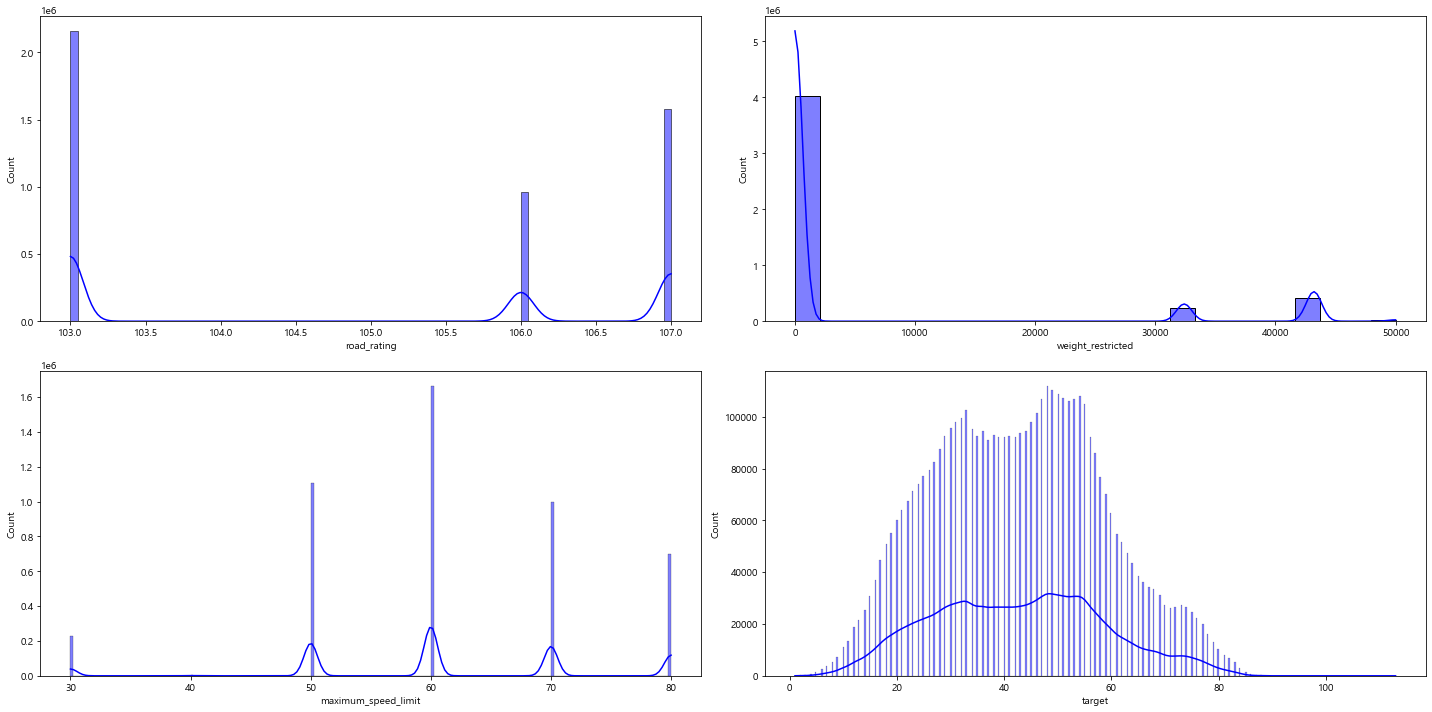

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.histplot(x=train['road_rating'],kde=True,ax=axes[0][0], color='blue')
sns.histplot(x=train['weight_restricted'],kde=True,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=True,ax=axes[1][0], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[1][1], color='blue')

plt.tight_layout()
plt.show()

# road_rating = 3 categorical values
# weight_restricted = Almost all 0
# maximum_speed_limit = Majority of them 60
# No continuous data

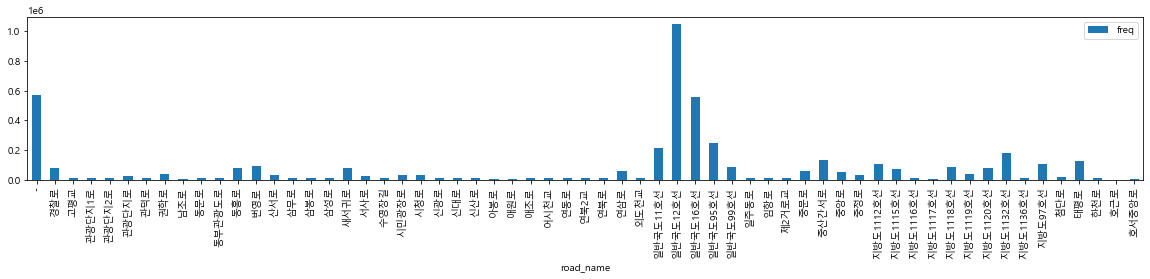

In [11]:
train1 = train.copy()
train1['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train1 = train1[['road_name','freq']]
train1 = train1.groupby('road_name').mean().reset_index()
train1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

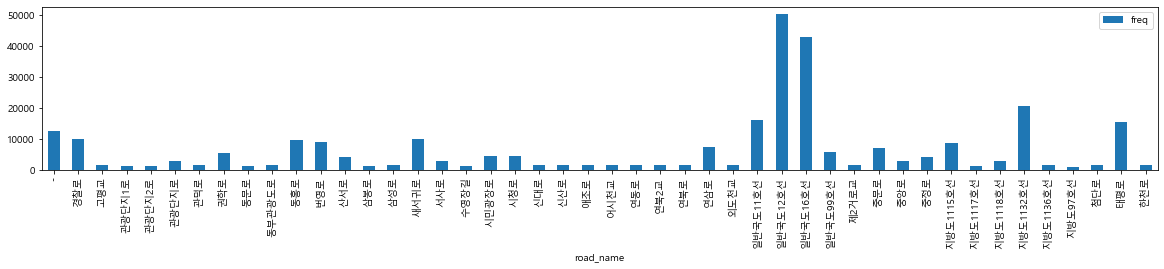

In [12]:
test1 = test.copy()
test1['freq'] = test1.groupby('road_name')['road_name'].transform('count')
test1 = test1[['road_name','freq']]
test1 = test1.groupby('road_name').mean().reset_index()
test1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

In [13]:
# 그룹화
train_date = train[['base_date','target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reindex(['월','화','수','목','금','토','일']).reset_index()

train_name = train[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

# Trend
* base_date = Increase in traffic from 07/2022
* base_hour = Decrease in traffic from 00-05h, increase in traffic from 05-18h (Huge Gap).
* day_of_week = Increase in traffic on Friday, decrease in traffic on weekends (Small Gap).
* road_name = Exists null value indicated with '-'.

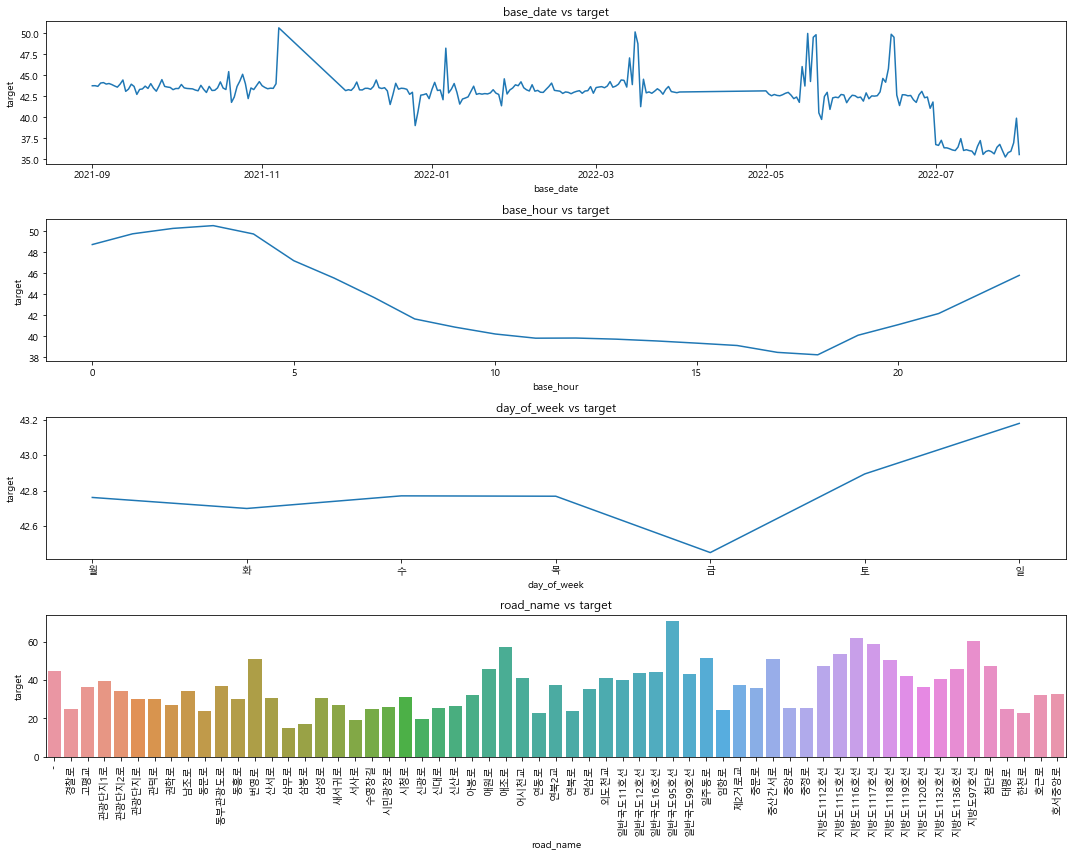

In [14]:
fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
train['year']= train['base_date'].dt.year
train['month']= train['base_date'].dt.month
train['day']= train['base_date'].dt.day

# Trend by Year/Month/Day
* year: No significant difference.
* month: Dramatic increase in July -> Summer Vacation?
* day: No significant difference.
* Month is the most significant feature.

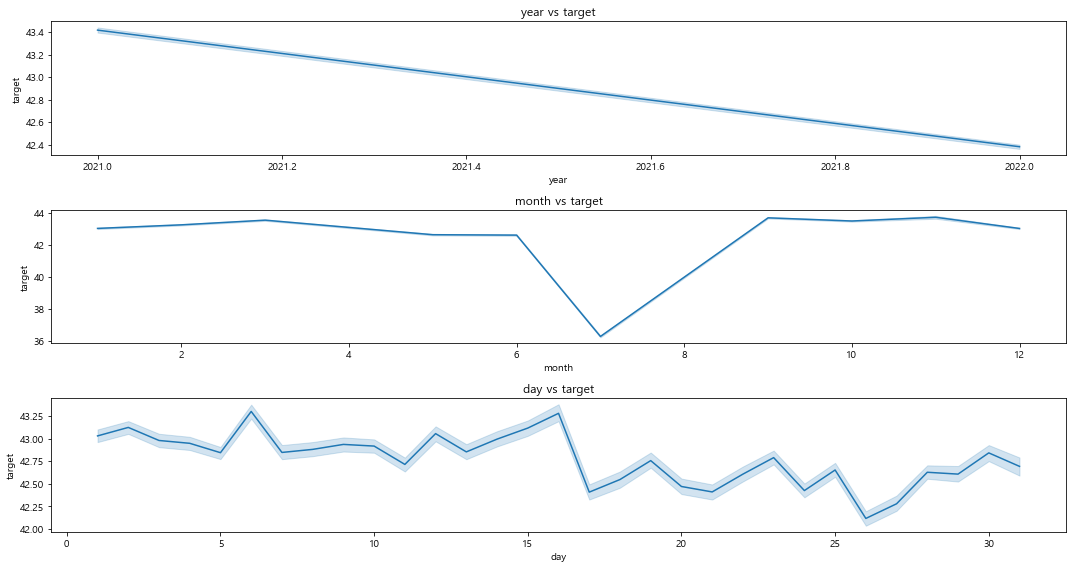

In [16]:
fig, axes = plt.subplots(3, figsize=(15,8))

sns.lineplot(x='year',y='target',data=train,ax=axes[0]).set(title='year vs target')
sns.lineplot(x='month',y='target',data=train,ax=axes[1]).set(title='month vs target')
sns.lineplot(x='day',y='target',data=train,ax=axes[2]).set(title='day vs target')

plt.tight_layout()
plt.show()

# Trend by Road
* Significant difference by road.
* Except for month, the rest shows a similar trend -> There are roads where traffic volume increases/decreases only in June-August (summer vacation).
* From 10km/h to 70km/h, there are roads with heavy traffic and roads with less traffic.
* There are roads that are not recorded till the end.

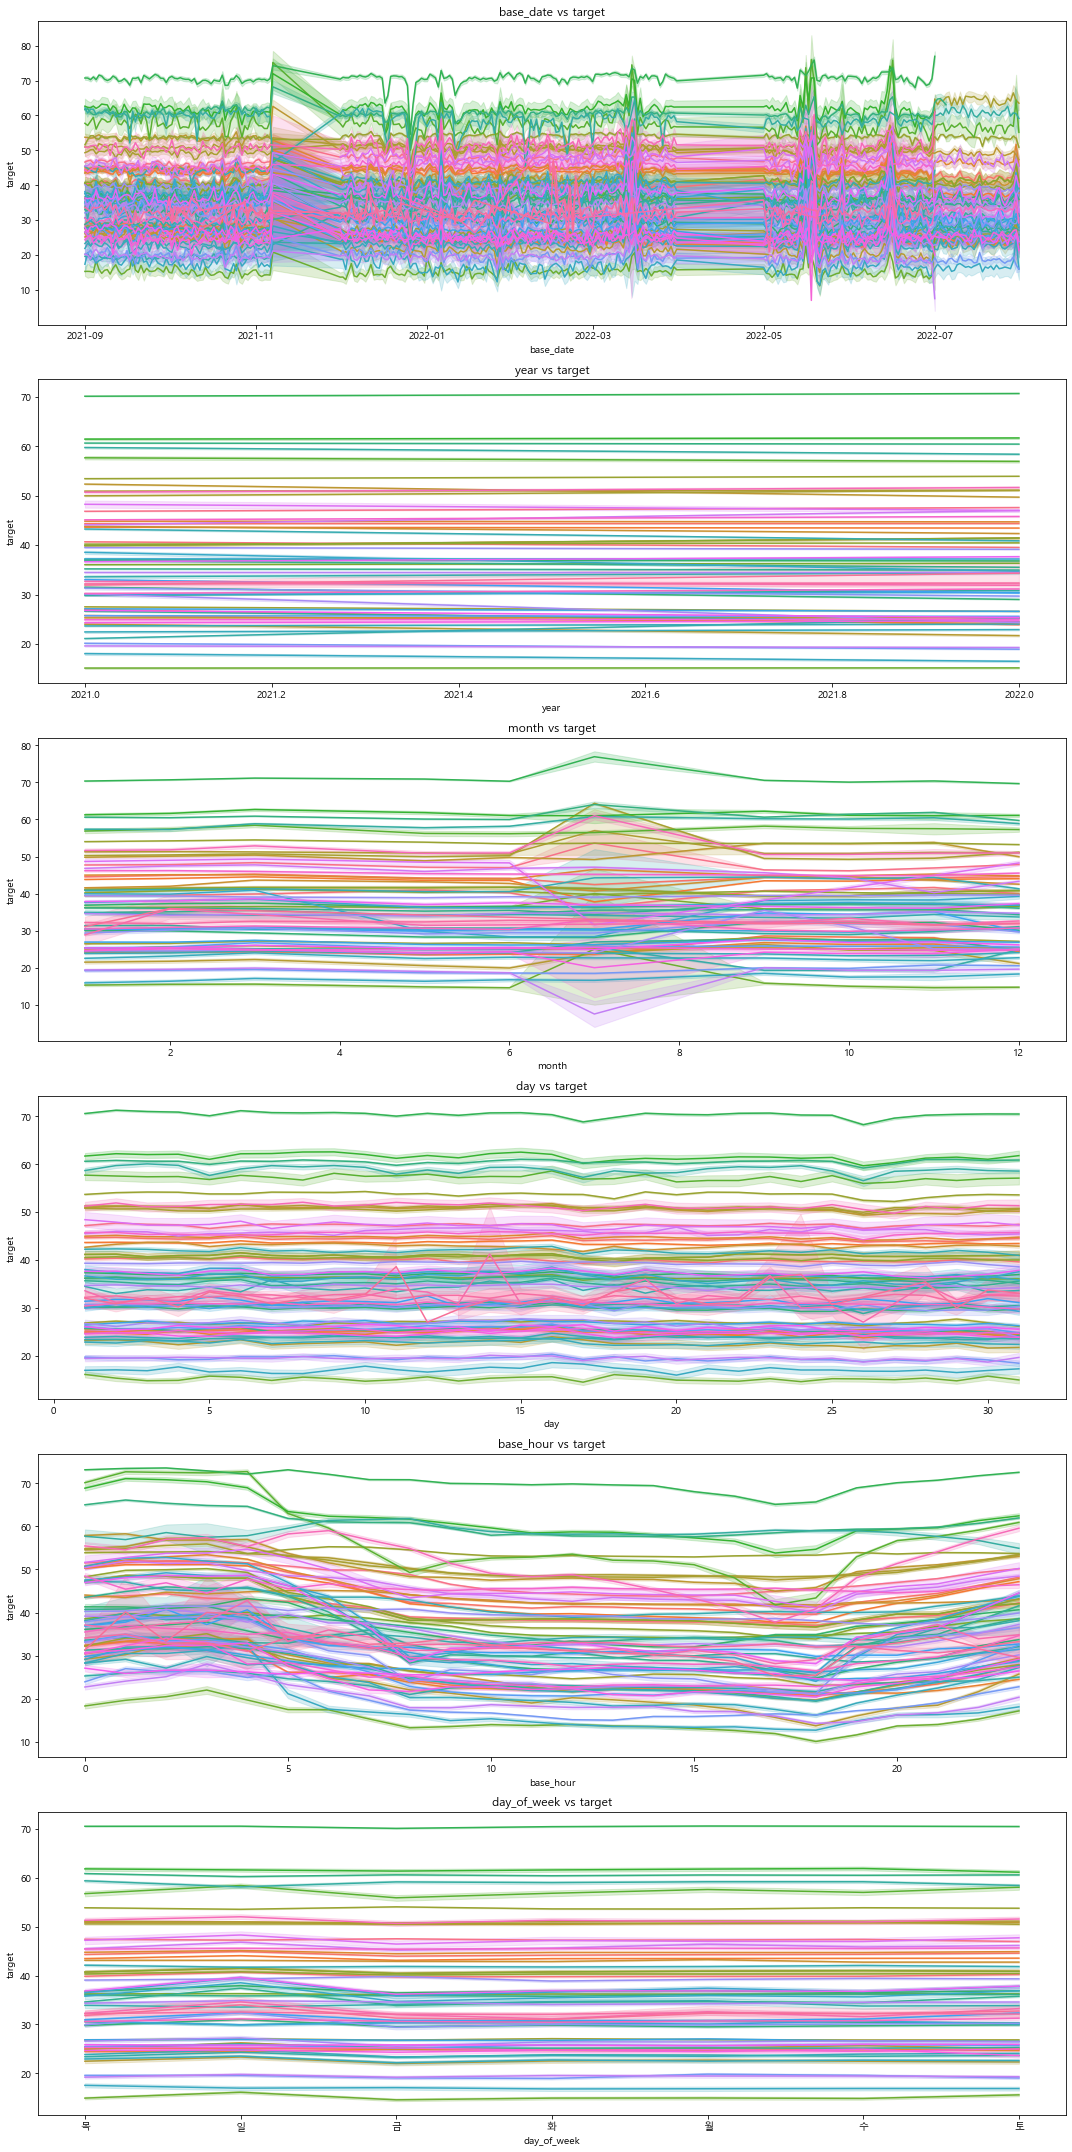

In [17]:
fig, axes = plt.subplots(6, figsize=(15,30))

sns.lineplot(x='base_date',y='target',hue='road_name',data=train,ax=axes[0],legend=False).set(title='base_date vs target')
sns.lineplot(x='year',y='target',hue='road_name',data=train,ax=axes[1],legend=False).set(title='year vs target')
sns.lineplot(x='month',y='target',hue='road_name',data=train,ax=axes[2],legend=False).set(title='month vs target')
sns.lineplot(x='day',y='target',hue='road_name',data=train,ax=axes[3],legend=False).set(title='day vs target')
sns.lineplot(x='base_hour',y='target',hue='road_name',data=train,ax=axes[4],legend=False).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',hue='road_name',data=train,ax=axes[5],legend=False).set(title='day_of_week vs target')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']
train1 = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train1[i])
    train1[i] = encoder.transform(train1[i])

train1

id  base_date  day_of_week  base_hour  lane_count  \
0        TRAIN_0000000 2022-06-23            1         17           1   
1        TRAIN_0000001 2022-07-28            1         21           2   
2        TRAIN_0000002 2021-10-10            4          7           2   
3        TRAIN_0000003 2022-03-11            0         13           2   
4        TRAIN_0000004 2021-10-05            6          8           2   
...                ...        ...          ...        ...         ...   
4701212  TRAIN_4701212 2021-11-04            1         16           1   
4701213  TRAIN_4701213 2022-03-31            1          2           2   
4701214  TRAIN_4701214 2022-06-13            3         22           2   
4701215  TRAIN_4701215 2021-10-20            2          2           2   
4701216  TRAIN_4701216 2021-10-19            6          6           2   

         road_rating  road_name  multi_linked  connect_code  \
0                106         46             0             0   
1                103         34             0             0   
2                103         36             0             0   
3                107         57             0             0   
4                103         35             0             0   
...              ...        ...           ...           ...   
4701212          107          0             0             0   
4701213          107          0             0             0   
4701214          103         35             0             0   
4701215          103         37             0             0   
4701216          107          1             0             0   

         maximum_speed_limit  ...  start_longitude  start_turn_restricted  \
0                       60.0  ...       126.662612                      0   
1                       60.0  ...       126.529107                      1   
2                       80.0  ...       126.368598                      0   
3                       50.0  ...       126.567204                      0   
4                       80.0  ...       126.326551                      0   
...                      ...  ...              ...                    ...   
4701212                 50.0  ...       126.278125                      0   
4701213                 80.0  ...       126.424368                      0   
4701214                 60.0  ...       126.912579                      0   
4701215                 80.0  ...       126.431817                      0   
4701216                 60.0  ...       126.508940                      0   

         end_node_name  end_latitude  end_longitude  end_turn_restricted  \
0                  386     33.427749     126.662335                    0   
1                    2     33.504811     126.526240                    0   
2                  179     33.280072     126.362147                    0   
3                  203     33.245565     126.566228                    0   
4                  269     33.462677     126.330152                    0   
...                ...           ...            ...                  ...   
4701212             42     33.420955     126.273750                    0   
4701213             31     33.472525     126.424890                    0   
4701214            214     33.444121     126.912948                    0   
4701215             23     33.444996     126.433332                    0   
4701216            247     33.257130     126.510364                    0   

         target  year  month  day  
0          52.0  2022      6   23  
1          30.0  2022      7   28  
2          61.0  2021     10   10  
3          20.0  2022      3   11  
4          38.0  2021     10    5  
...         ...   ...    ...  ...  
4701212    20.0  2021     11    4  
4701213    65.0  2022      3   31  
4701214    30.0  2022      6   13  
4701215    73.0  2021     10   20  
4701216    35.0  2021     10   19  

[4701217 rows x 26 columns]

C:\Users\pgon8\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\pgon8\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


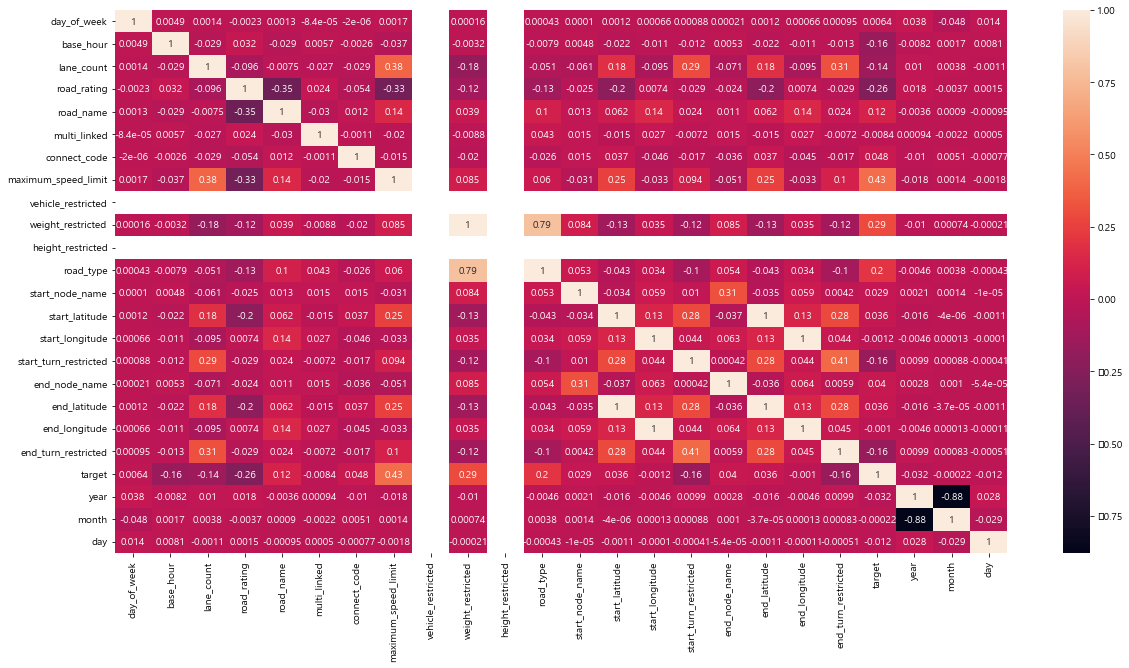

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(),annot=True)
plt.show()

# maximum_speed_limit, weight_restricted, road_type shows correlation

In [38]:
train.loc[(train['start_node_name']=='남수교') | (train['end_node_name']=='남수교'),'road_name']='서성로'
train.loc[(train['start_node_name']=='성읍사거리') | (train['end_node_name']=='성읍사거리'),'road_name']='지방도1136호선' ##
train.loc[(train['start_node_name']=='난산사거리') | (train['end_node_name']=='난산사거리'),'road_name']='난산로'
train.loc[train['start_node_name']=='교보생명','road_name']='고성오조로'
train.loc[(train['start_node_name']=='성산포식당') | (train['end_node_name']=='성산포식당'),'road_name']='일출로' ##
train.loc[(train['start_node_name']=='수협') | (train['end_node_name']=='수협'),'road_name']='동류암로'
train.loc[(train['start_node_name']=='주차장') | (train['end_node_name']=='주차장'),'road_name']='김녕로'
train.loc[(train['start_node_name']=='해안교') | (train['end_node_name']=='해안교'),'road_name']='애조로'
train.loc[(train['start_node_name']=='수간교차로') | (train['end_node_name']=='수간교차로'),'road_name']='애조로'
train.loc[(train['start_node_name']=='상귀교차로') | (train['end_node_name']=='상귀교차로'),'road_name']='애조로'
train.loc[(train['start_node_name']=='광삼교') | (train['end_node_name']=='광삼교'),'road_name']='애조로'
train.loc[(train['start_node_name']=='일호유리') & (train['end_node_name']=='하귀입구'),'road_name']='하광로'
train.loc[(train['start_node_name']=='하귀입구') & (train['end_node_name']=='일호유리'),'road_name']='하광로'
train.loc[(train['start_node_name']=='감귤선과장') | (train['end_node_name']=='감귤선과장'),'road_name']='천덕로'
train.loc[(train['start_node_name']=='삼다식품') | (train['end_node_name']=='삼다식품'),'road_name']='천덕로'
train.loc[(train['start_node_name']=='나동') | (train['end_node_name']=='나동'),'road_name']='한림상로'
train.loc[(train['start_node_name']=='월계교') | (train['end_node_name']=='월계교'),'road_name']='한림상로'
train.loc[(train['start_node_name']=='농협주유소') & (train['end_node_name']=='하나로마트'),'road_name']='한림상로'
train.loc[(train['start_node_name']=='하나로마트') & (train['end_node_name']=='농협주유소'),'road_name']='한림상로'
train.loc[(train['start_node_name']=='창성세차장') | (train['end_node_name']=='창성세차장'),'road_name']='한림서길'
train.loc[(train['start_node_name']=='수원씽크공장') | (train['end_node_name']=='수원씽크공장'),'road_name']='한수풀로'
train.loc[(train['start_node_name']=='금덕해운') | (train['end_node_name']=='금덕해운'),'road_name']='한수풀로'
train.loc[(train['start_node_name']=='원일공사') | (train['end_node_name']=='원일공사'),'road_name']='한수풀로'
train.loc[(train['start_node_name']=='한림1리복지회관') | (train['end_node_name']=='한림1리복지회관'),'road_name']='한림해안로'
train.loc[(train['start_node_name']=='한수풀횟집') | (train['end_node_name']=='한수풀횟집'),'road_name']='한림해안로'
train.loc[(train['start_node_name']=='수협중앙회') | (train['end_node_name']=='수협중앙회'),'road_name']='한림해안로'
train.loc[(train['start_node_name']=='한림어촌계') & (train['end_node_name']=='옹포사거리'),'road_name']='한림로'
train.loc[(train['start_node_name']=='옹포사거리') & (train['end_node_name']=='한림어촌계'),'road_name']='한림로'
train.loc[(train['start_node_name']=='고림동4거리') | (train['end_node_name']=='고림동4거리'),'road_name']='명월로'
train.loc[(train['start_node_name']=='가는질') | (train['end_node_name']=='가는질'),'road_name']='일반국도16호선'    ##
train.loc[(train['start_node_name']=='광평교차로') | (train['end_node_name']=='광평교차로'),'road_name']='신록남로'
train.loc[(train['start_node_name']=='예래입구') | (train['end_node_name']=='예래입구'),'road_name']='천제연로'
train.loc[(train['start_node_name']=='산신주유소') | (train['end_node_name']=='산신주유소'),'road_name']='천제연로'
train.loc[(train['start_node_name']=='천제이교') | (train['end_node_name']=='천제이교'),'road_name']='관광단지1로' ##
train.loc[(train['start_node_name']=='중산간도로삼거리') | (train['end_node_name']=='중산간도로삼거리'),'road_name']='신서귀로'
train.loc[(train['start_node_name']=='서울이용원') & (train['end_node_name']=='남양리조트'),'road_name']='태평로'
train.loc[(train['start_node_name']=='남양리조트') & (train['end_node_name']=='서울이용원'),'road_name']='태평로'
train.loc[(train['start_node_name']=='서울이용원') & (train['end_node_name']=='뉴본아파트'),'road_name']='태평로'
train.loc[(train['start_node_name']=='뉴본아파트') & (train['end_node_name']=='서울이용원'),'road_name']='태평로'
train.loc[(train['start_node_name']=='정방수퍼') & (train['end_node_name']=='서울이용원'),'road_name']='정방로'
train.loc[(train['start_node_name']=='서울이용원') & (train['end_node_name']=='정방수퍼'),'road_name']='정방로'
train.loc[(train['start_node_name']=='오렌지농원') | (train['end_node_name']=='오렌지농원'),'road_name']='일반국도11호선'
train.loc[(train['start_node_name']=='송목교') | (train['end_node_name']=='송목교'),'road_name']='서성로' ##
train.loc[(train['start_node_name']=='한남교차로') | (train['end_node_name']=='한남교차로'),'road_name']='서성로' ##
train.loc[(train['start_node_name']=='서중2교') & (train['end_node_name']=='서중2교'),'road_name']='서성로' ##
train.loc[(train['start_node_name']=='신하교') & (train['end_node_name']=='신하교'),'road_name']='서성로' ##
train.loc[(train['start_node_name']=='상위미') | (train['end_node_name']=='상위미'),'road_name']='위미항구로'
train.loc[(train['start_node_name']=='진은교차로') | (train['end_node_name']=='진은교차로'),'road_name']='일주동로' ##
train.loc[(train['start_node_name']=='제2태흥교') | (train['end_node_name']=='제2태흥교'),'road_name']='일주동로' ##
train.loc[(train['start_node_name']=='금성동교차로') | (train['end_node_name']=='금성동교차로'),'road_name']='일주동로' ##
train.loc[(train['start_node_name']=='하나로교') & (train['end_node_name']=='하나로교'),'road_name']='일주동로'
train.loc[(train['start_node_name']=='우사') | (train['end_node_name']=='우사'),'road_name']='동광로'

In [39]:
names = train['road_name'].unique()

<Figure size 2160x3600 with 0 Axes>

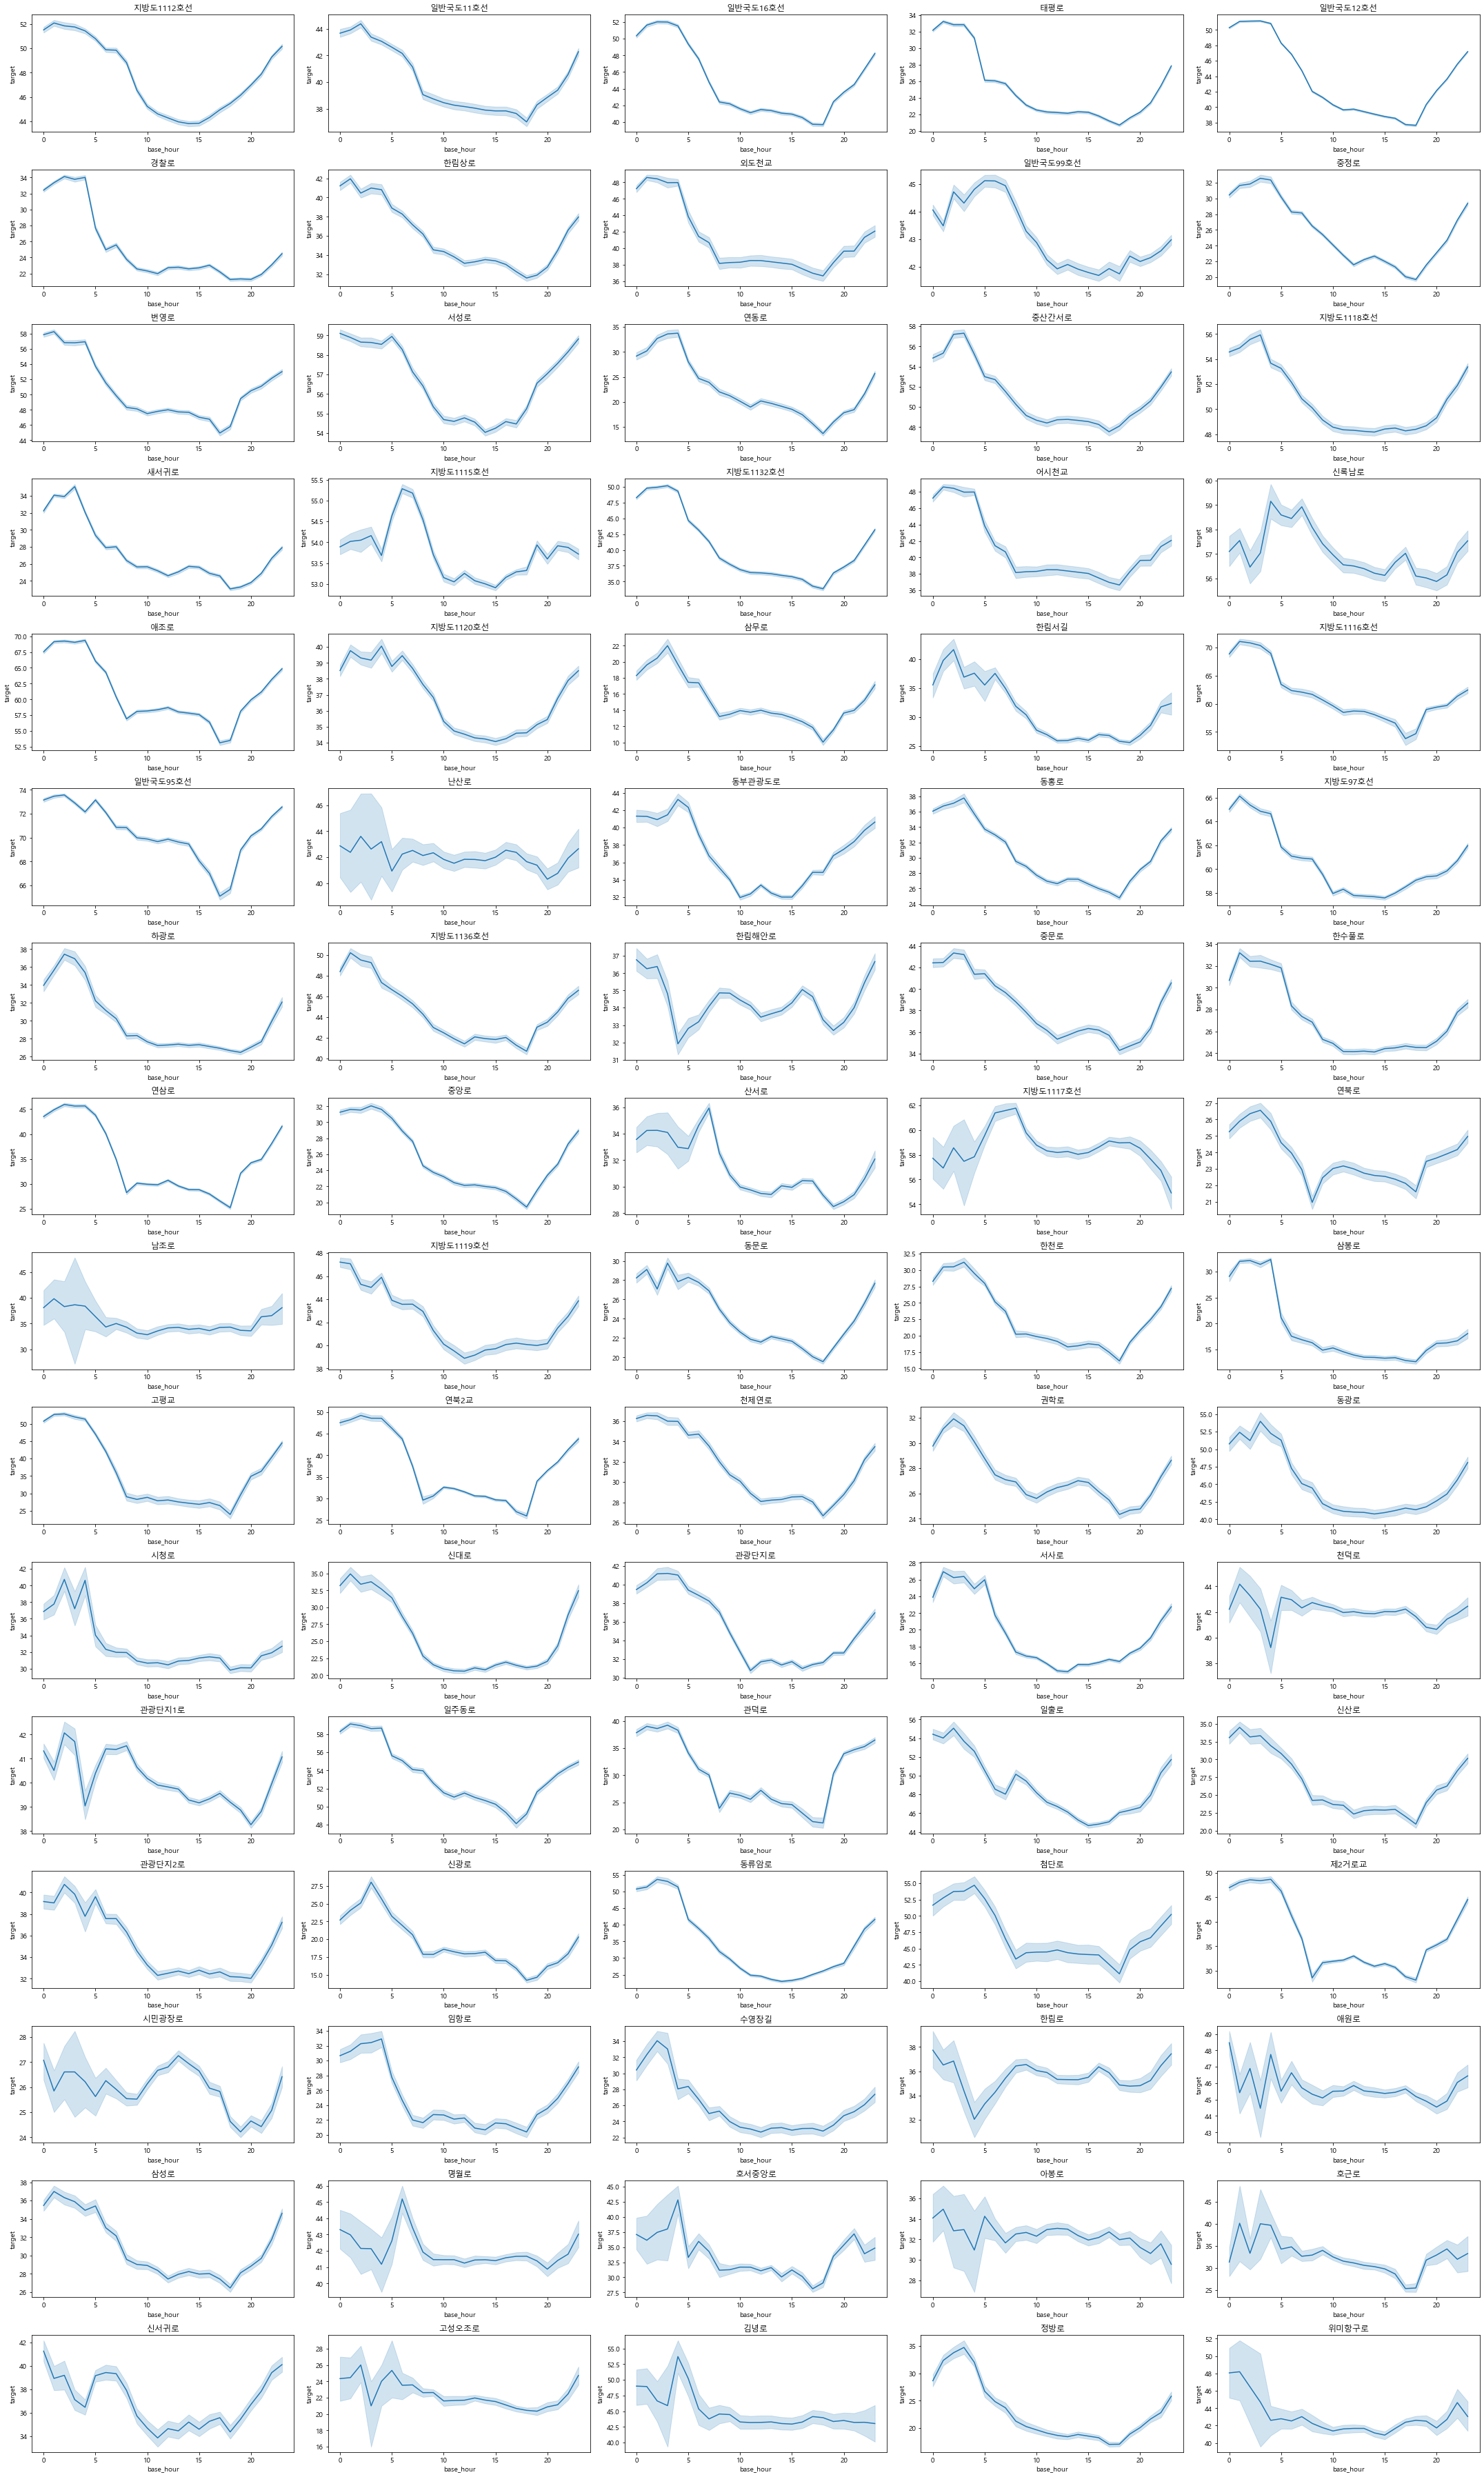

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(30,50))
plt.subplots(16,5,figsize=(30,50))

i = 0

for name in names:
  plt.subplot(16,5,i+1)
  a = train.loc[train['road_name']==names[i]]
  sns.lineplot(x='base_hour',y='target',data=a)
  plt.title(names[i])
  i += 1
  plt.tight_layout()

<Figure size 2160x3600 with 0 Axes>

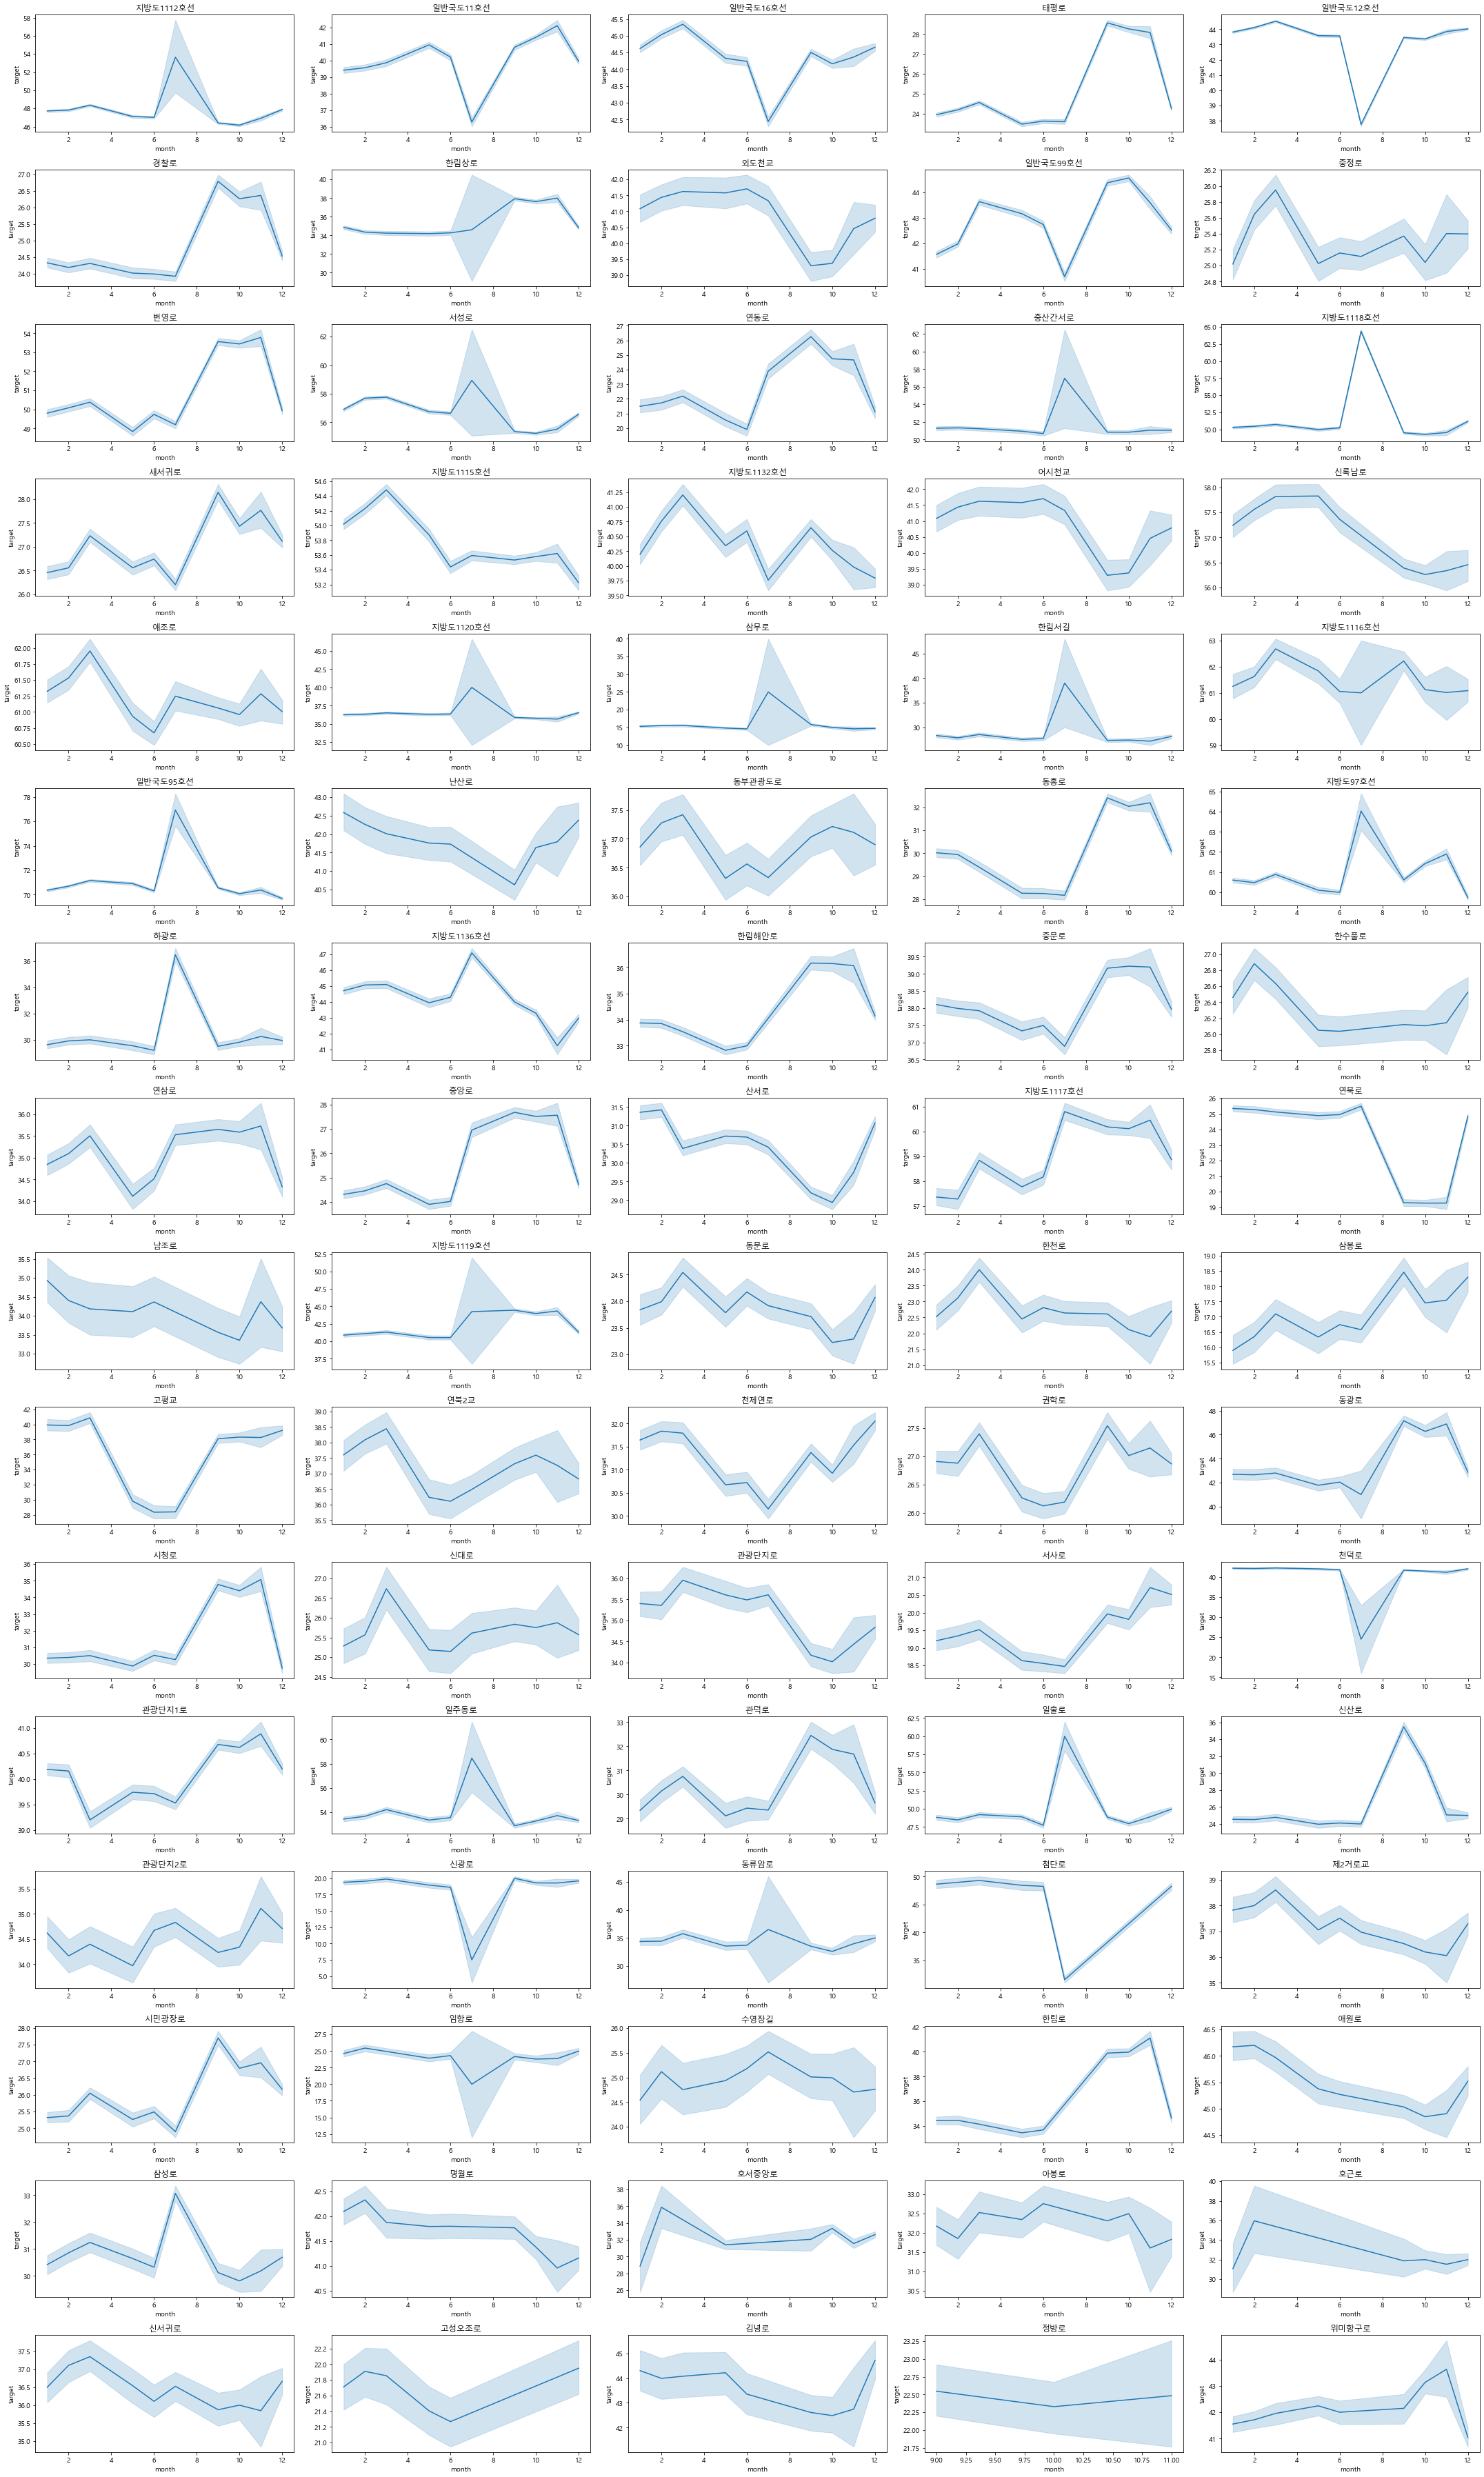

In [46]:
plt.figure(figsize=(30,50))
plt.subplots(16,5,figsize=(30,50))

i = 0

for name in names:
  plt.subplot(16,5,i+1)
  a = train.loc[train['road_name']==names[i]]
  sns.lineplot(x='month',y='target',data=a)
  plt.title(names[i])
  i += 1
  plt.tight_layout()

<Figure size 2160x3600 with 0 Axes>

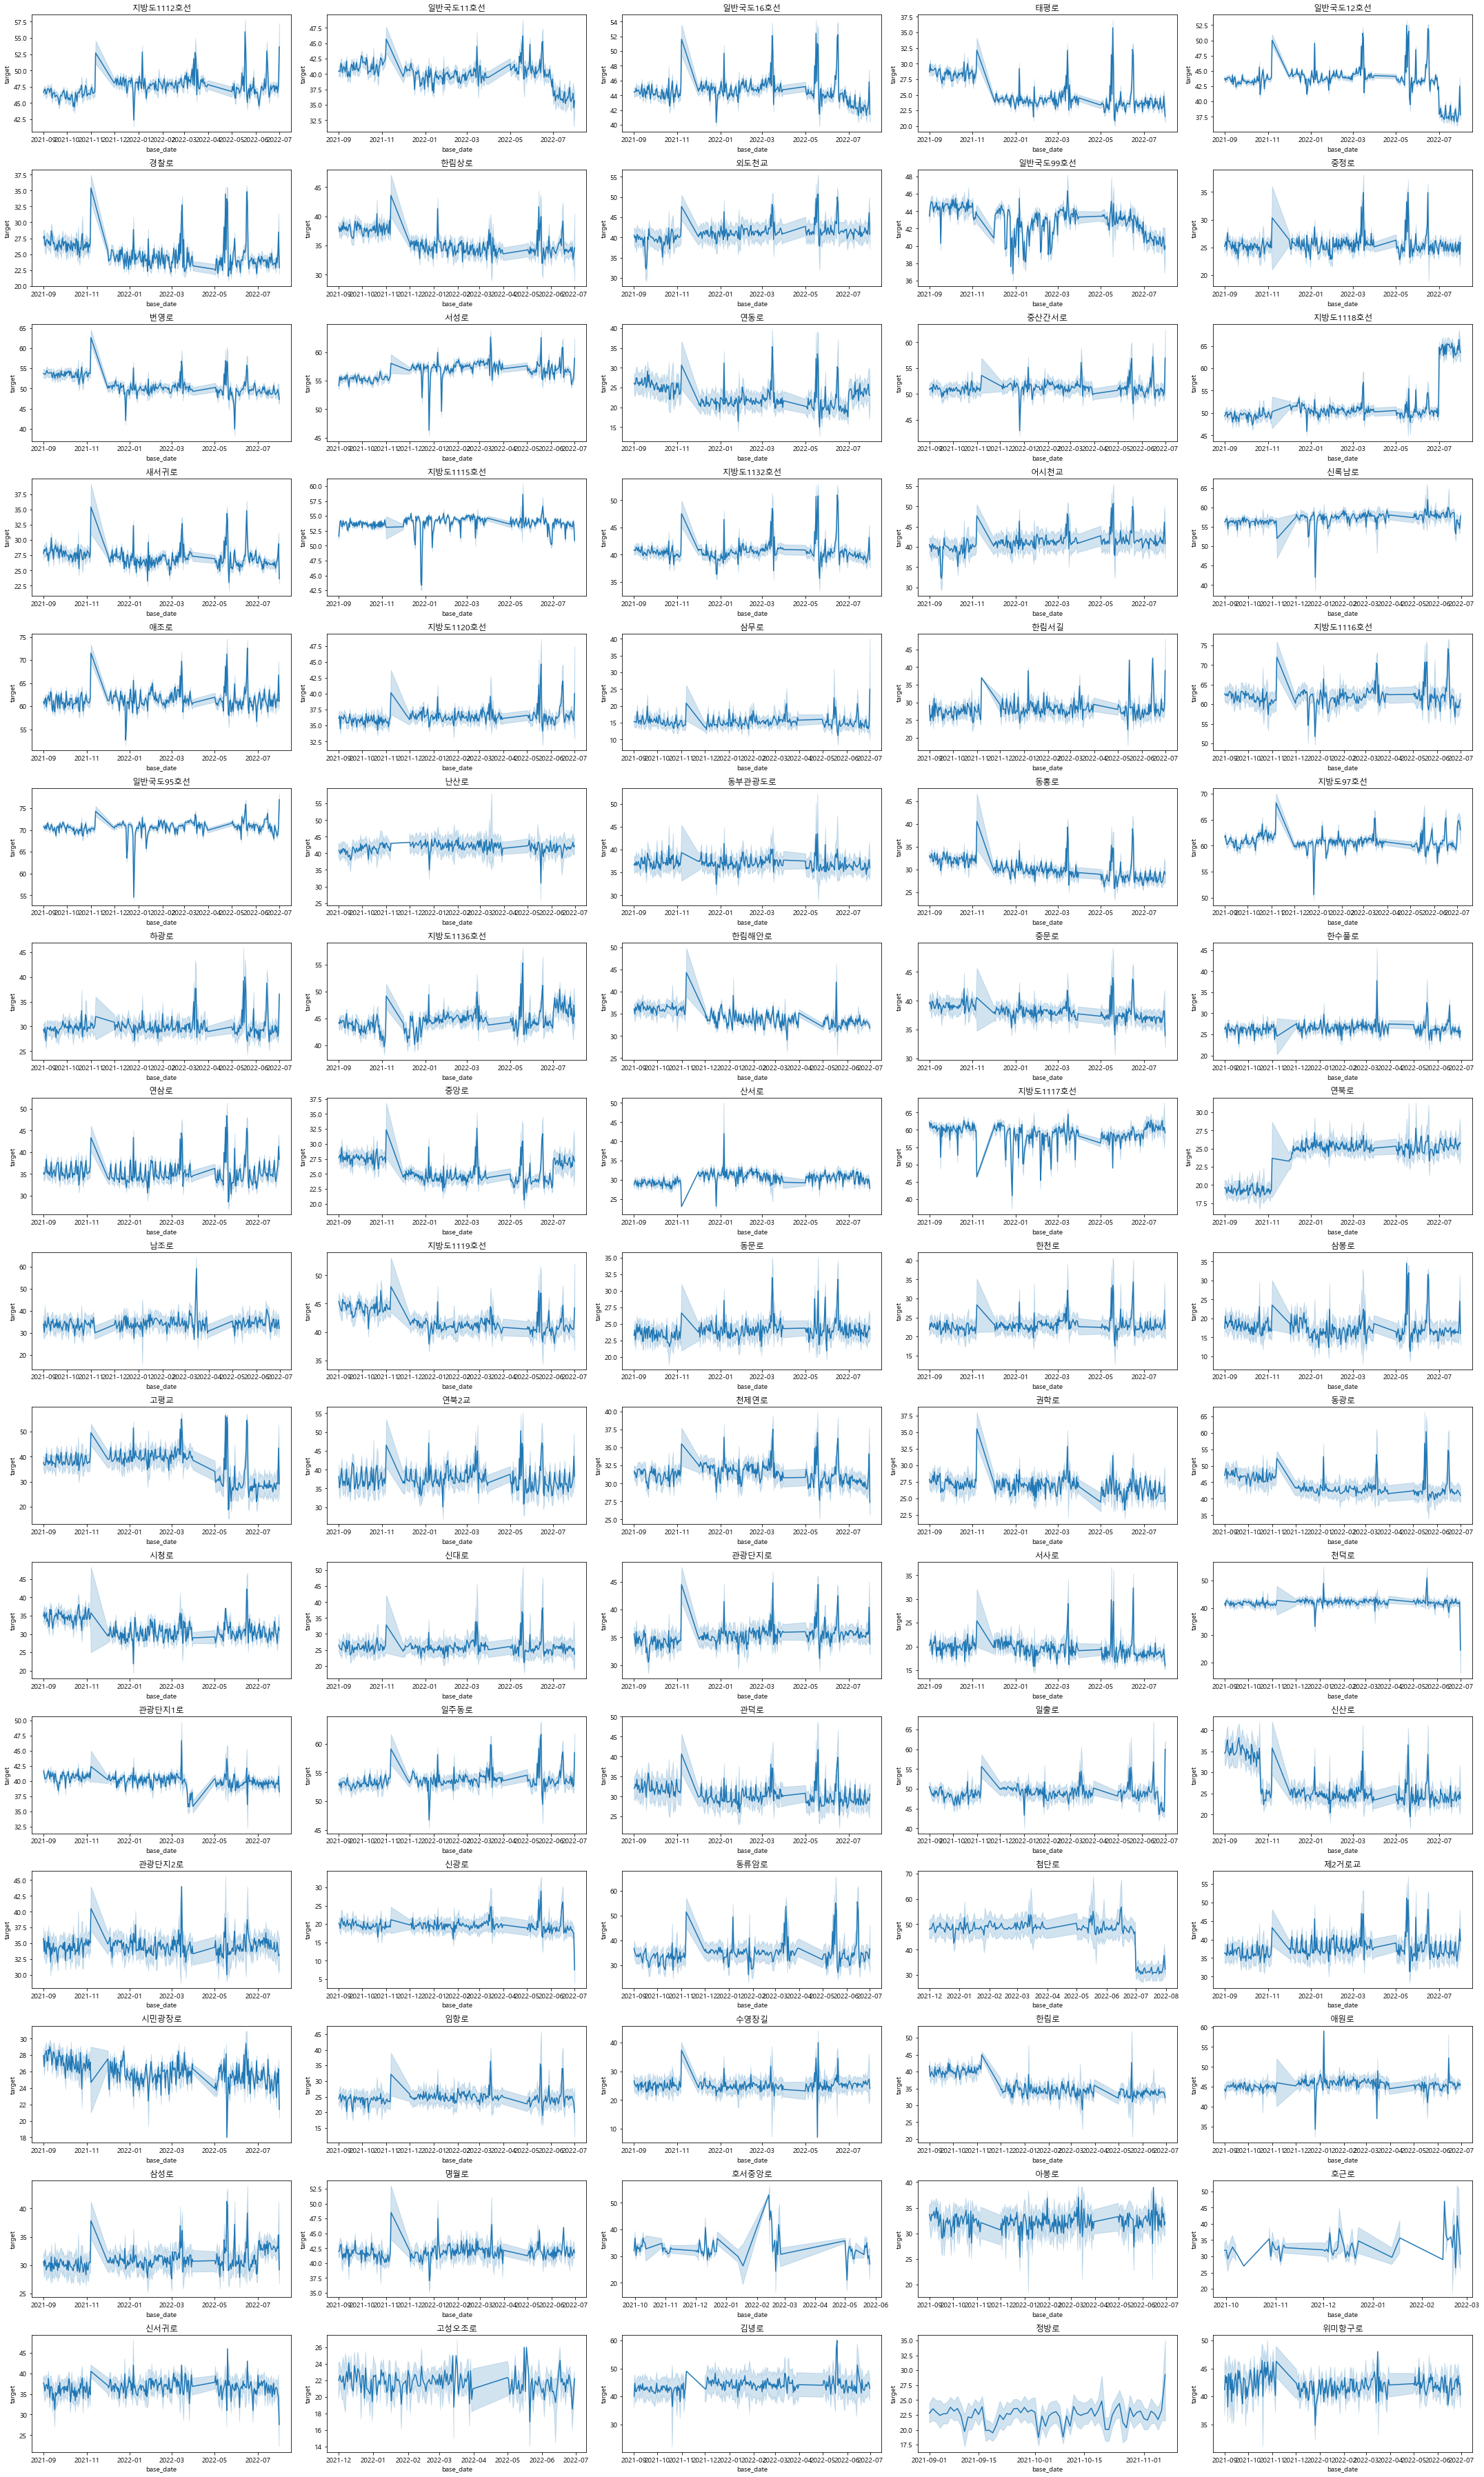

In [47]:
plt.figure(figsize=(30,50))
plt.subplots(16,5,figsize=(30,50))

i = 0

for name in names:
  plt.subplot(16,5,i+1)
  a = train.loc[train['road_name']==names[i]]
  sns.lineplot(x='base_date',y='target',data=a)
  plt.title(names[i])
  i += 1
  plt.tight_layout()